# Graphs Notes

## What is a graph?
- A graph is an abstract data type representing nodes (vertices) and their connections (edges). It can be thought of as a generalized tree where each node can be connected to another node <br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/640px-6n-graf.svg.png" width="300">

For the above graph:
- $ V = \{1, 2, 3, 4, 5, 6\}$
- $ E = \{(1, 2), (1, 5), (2, 5), (2, 3), (3, 4), (4, 5), (4, 6)\}$

### Terminology
1. **Adjacent**: two vertices $v_k$ and $v_l$ are adjacent if they are connected by an edge ($(v_k, v_l) \in E$)
    - Ex: vertices 4 and 6 are adjacent
    - Ex: vertices 4 and 2 are *not* adjacent
2. **Path**: a sequence of edges leading from a source (starting) vertex to a destination (ending) vertex
    - Ex: a path from 1 to 6 is: (1, 2), (2, 3), (3, 4), (4, 6)
3. **Path Length**: The number of edges in the path
    - Ex: The length of the above path is 4 edges
4. **Distance**: The distance between two vertices is the path length for the shortest path between two vertices
    - Ex: the shortest path from 1 to 6 is: (1, 5), (5, 4), (4, 6) which has a path length of 3, therefore the distance from 1 to 6 is 3

## Graph Variations

### Weighted Graph
Each edge in a weighted graph has an associated "weight", or value associated with it. This weight represents the cost to move from one vertext to another <br>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/5f/CPT-Graphs-undirected-weighted.svg" width="300"> <br>
The above example shows the distances in miles between pairs of towns in England. In a weighted graph, the *weighted path length* is the sum of the weights of the edges in a path. For example, the path from Dunwich to Maldon: (Dunwich, Blaxhall, 15), (Blaxhall, Feering, 46), (Feering, Maldon, 11) has weight 15 + 46 + 11 = 72

### Directed Graph (Digraph)
Edges in a directed graph have a "way" associated with them (e.g. one-way or two-way). An arrow is typically used to denote the direction of the edge <br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/CPT-Graphs-directed-unweighted.svg/1000px-CPT-Graphs-directed-unweighted.svg.png" width="300"> <br>
The above example shows that it is easy to get between Dunwich and Blaxhall, but could be quite long to get between Feering and Tiptree, depending on the direction of travel! Tiptree to Feering is one edge away, but Feering to Tiptree is two edges away.

#### Digraph Cycle
A path that starts and ends at the same vertex is called a *cycle*. In the above example, there are several cycles. For example:
* Feering, Maldon, Tiptree
* Maldon, Tiptree, Clacton
* Feering, Maldon, Tiptree, Clacton, Harwich, Tiptree, Feering

Graphs without cycles are called *acyclic* graphs. An directed, acyclic graph is called a DAG.

#### Weighted Digraph
A graph can be both directed and weighted <br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/CPT-Graphs-directed-weighted.svg/200px-CPT-Graphs-directed-weighted.svg.png" width="300">

## Graph Abstract Data Type
Vertices in a graph ADT store a value, called the key, that names the vertex. Edges represent relationships/connections amongst the keys. The interface of a graph ADT includes the following constructor, methods, and operators: 
1. `Graph()` creates a new, empty graph.
1. `add_vertex(vert)` adds an instance of Vertex to the graph.
1. `add_edge(from_vert, to_vert)` adds a new, directed edge to the graph that connects two vertices.
1. `add_edge(from_vert, to_vert, weight)` adds a new, weighted, directed edge to the graph that connects two vertices.
1. `get_vertex(vert_key)` finds the vertex in the graph named vertKey.
1. `get_vertices()` returns the list of all vertices in the graph.
1. `in` returns True for a statement of the form vertex in graph, if the given vertex is in the graph, False otherwise.

## Graph Implementation
We are going to cover two different implementations
1. Adjacency matrices
2. Adjacency lists

## Adjacency Matrices
An adjacency matrix is a two-dimensional matrix were each vertex $v_{i}$ is assigned row $i$ and column $i$. If two vertices $v_{i}$ and $v_{j}$ are adjacent, then there is a 1 in the $i$ th row and $j$ th column in the matrix. If two vertices are not adjacent, then a 0 is placed in the respective row and column.

Consider the example graph: 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/640px-6n-graf.svg.png" width="300">

An adjacency matrix for the above graph pictorially:

```
   |1|2|3|4|5|6|
|-||-|-|-|-|-|-|
|1|0|1|0|0|1|0|
|2|1|0|1|0|1|0|
|3|0|1|0|1|0|0|
|4|0|0|1|0|1|1|
|5|1|1|0|1|0|0|
|6|0|0|0|1|0|0|
```

And using lists:

```
amatrix = [[0,1,0,0,1,0],
           [1,0,1,0,1,0],
           [0,1,0,1,0,0],
           [0,0,1,0,1,1],
           [1,1,0,1,0,0],
           [0,0,0,1,0,0]]
```

To find out if two vertices $v_{i}$ and $v_{j}$ are adjacent, we simply need to look up if there is a one in `amatrix[i][j]`, which is constant time $\mathcal{O(1)}$. 

The size of this matrix is the number of vertices squared, which can be quite large. Adjacency matrices with the majority of the entries 0 is said to be *sparse* and is not an effective use of memory. This shortcoming be overcome with a [*sparse matrix* representation](https://en.wikipedia.org/wiki/Sparse_matrix#Storing_a_sparse_matrix), such as adjacency lists. As we will say, we trade off space for lookup time complexity.

For an implementation of an adjacency matrix look at MA 7

## Adjacency Lists
An adjacency list is a list of vertices where each vertex has a list of adjacent vertices. Each vertex in the list of adjacent vertices represents an edge. 

Consider the example graph: 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/640px-6n-graf.svg.png" width="300">

An adjacency list for the above graph implemented using Python dictionaries:

```python
alist = {1: [2, 5],
         2: [1, 3, 5],
         3: [2, 4],
         4: [3, 5],
         5: [1, 2, 4],
         6: [4]}
```

The size of this dictionary is the number of vertices (keys) plus two times the number of edges (each edge appears once in the graph but is stored as a list value twice). To find out if two vertices $v_{i}$ and $v_{j}$ are adjacent, we simply need to look up $v_{i}$, walk through each item in $v_{i}$'s edge list, looking for $v_{j}$. In the worst case, $v_{i}$ is fully connected to every other vertex in the graph and this list traversal is $\mathcal{O(V)}$. 

## Weighted Graphs
In the case of a weighted graph, we need to store additional information for each edge, the weight! With the adjacency matrix, we either need to store an object (such as a tuple or an instance of a custom `Vertex` class) instead of 1 or we need to maintain a parallel matrix with this information. With the adjacency list, we can modify our keys to be instances of a custom `Vertex` class.

The `Vertex` class will store the name of the vertex and a dictionary of adjacent vertex names (keys) and edge weights (values). Then, the adjacency list is a dictionary of vertex names (keys) and `Vertex` objects (values). We will define a `Graph` class to wrap this adjacency list dictionary with our graph ADT methods:
1. `add_vertex(vert)` adds an instance of Vertex to the graph.
1. `add_edge(from_vert, to_vert)` adds a new, directed edge to the graph that connects two vertices.
1. `add_edge(from_vert, to_vert, weight)` adds a new, weighted, directed edge to the graph that connects two vertices.
1. `get_vertex(vert_key)` finds the vertex in the graph named vertKey.
1. `get_vertices()` returns the list of all vertices in the graph.
1. `in` returns True for a statement of the form vertex in graph, if the given vertex is in the graph, False otherwise.

### Adjacency List Implementation

In [1]:
class Vertex:
    """
    Keeps track of the vertices it is connected to, and the weight of each edge
    """
    def __init__(self, key):
        self.ID = key
        self.connected_to = {} #this is a dictionary, not a set

    def __str__(self):
        return str(self.ID) + ' connected to: ' + str([x.ID for x in self.connected_to])


    def add_neighbor(self, neighbor, weight=0):
        """
        Add a connection from this vertex to another
        """
        self.connected_to[neighbor] = weight 
    
    def get_ID(self):
        return self.ID 

    def get_weight(self, neighbor):
        return self.connected_to[neighbor]

    def get_connections(self):
        return self.connected_to.keys()

class Graph:
    """
    Contains a dictionary that maps vertex names to vertex objects
    """
    def __init__(self):
        self.vert_list = {}
        self.num_vertices = 0

    def __str__(self):
        edges = ""
        for vert in self.vert_list.values():
            for vert2 in vert.get_connections():
                edges += "(%s, %s)\n" %(vert.get_ID(), vert2.get_ID())
        return edges

    def __contains__(self, n):
        """
        in operator
        """
        return n in self.vert_list

    def __iter__(self):
        return iter(self.vert_list.values())

    def add_vertex(self, key):
        """
        Adds a vertex to the graph
        """
        self.num_vertices += 1
        new_vertex = Vertex(key)
        self.vert_list[key] = new_vertex
        return new_vertex

    def add_edge(self, f, t, cost=0):
        """
        Connects one vertex to another
        """
        if f not in self.vert_list:
            nv = self.add_vertex(f)
        if t not in self.vert_list:
            nv = self.add_vertex(t)
        self.vert_list[f].add_neighbor(self.vert_list[t], cost)

    def get_vertices(self):
        """
        returns the names of all the vertices in the graph
        """
        return self.vert_list.keys()
    
    def get_vertex(self, n):
        '''
        
        '''
        if n in self.vert_list:
            return self.vert_list[n]
        else:
            return None



In [2]:
g = Graph()
for i in range(1, 7):
    g.add_vertex(i)

# each edge is two-way
g.add_edge(1, 2, 1 * 2)
g.add_edge(2, 1, 1 * 2)

g.add_edge(1, 5, 1 * 5)
g.add_edge(5, 1, 1 * 5)

g.add_edge(2, 5, 2 * 5)
g.add_edge(5, 2, 2 * 5)

g.add_edge(2, 3, 2 * 3)
g.add_edge(3, 2, 2 * 3)

g.add_edge(3, 4, 3 * 4)
g.add_edge(4, 3, 3 * 4)

g.add_edge(4, 5, 4 * 5)
g.add_edge(5, 4, 4 * 5)

g.add_edge(4, 6, 4 * 6)
g.add_edge(6, 4, 4 * 6)
print(g)

(1, 2)
(1, 5)
(2, 1)
(2, 5)
(2, 3)
(3, 2)
(3, 4)
(4, 3)
(4, 5)
(4, 6)
(5, 1)
(5, 2)
(5, 4)
(6, 4)



## Graph Traversal Methods
Similar to trees, we need traversal algorithms that start at a vertex and visit every other vertex in a graph. The order at which we visit the vertices depends on the algorithm. The most common graph traversal algorithms include:
- Breadth first search (BFS)
- Depth First Search (DFS)

### Breadth First Search
Big picture idea: explore the closest neighborhoods first

BFS starts at a vertex and visits each vertex that is distance 1 away, then each vertex that is distance 2 away, until all connected vertices have been visited. No vertex will be visited twice.

Some vertices have multiple adjacent vertices. For these vertices a decision will need to be made about the order in which to visit the neighbor vertices. Consequently, a BFS traversal is not unique.

The BFS algorithm makes use of a queue to keep track of the vertices to visit, which we will call the `frontier_queue` (these are vertices that have been discovered but not processed). The algorithm also tracks the discovered (possibly not yet processed) vertices in a set (a list without duplicates). We will call the set `discovered_set`.
1. Enqueue the starting vertex to `frontier_queue`
1. Add the starting vertex to `discovered_set`
1. While `frontier_queue` is not empty
    1. Dequeue `frontier_queue`. Call this vertex `V`
    1. Process `V`
    1. For each adjacent vertex `AV` of `V`
        1. If `AV` not in `discovered_set`:
            1. Enqueue `AV` to `frontier_queue`
            1. Add `AV` to `discovered_set`

Time Complexity: $O(V + E)$ where V is the # of vertices and E is the # of edges

In [3]:
from collections import deque
import timeit
# a double ended queue with support for
# append
# append left
# pop
# pop left

test = Graph()
test.add_vertex("s")
test.add_vertex("a")
test.add_vertex("c")
test.add_vertex("b")
test.add_vertex("d")
test.add_vertex("e")

test.add_edge("s", "c")
test.add_edge("s", "a")
test.add_edge("s", "d")
test.add_edge("c", "b")
test.add_edge("b", "d")
test.add_edge("d", "c")
test.add_edge("c", "e")
test.add_edge("e", "s")

def bfs(g, start):
    '''
    enqueue: append left
    dequeue: pop right
    '''
    frontier_queue = deque()
    frontier_queue.appendleft(start)
    discovered_set = set([start])
    
    while len(frontier_queue) > 0:
        curr_v = frontier_queue.pop()
        print(curr_v)
        for adj_v in curr_v.get_connections():
            if adj_v not in discovered_set:
                frontier_queue.appendleft(adj_v)
                discovered_set.add(adj_v)
timeit.timeit(lambda:bfs(test, test.get_vertex("s")), number=1)

s connected to: ['c', 'a', 'd']
c connected to: ['b', 'e']
a connected to: []
d connected to: ['c']
b connected to: ['d']
e connected to: ['s']


0.001276700000062192

### Depth-First Search
Big picture idea: explore paths as deeply as they go

DFS starts at a vertex and visits each vertex along each path before backtracking on the path. No vertex will be visited twice.

Some vertices have multiple adjacent vertices. For these vertices a decision will need to be made about the order in which to visit the neighbor vertices. Consequently, a DFS traversal is not unique.

The DFS algorithm makes use of a stack to keep track of the vertices to visit, which we will call the `frontier_stack` (these are vertices that have been discovered but not processed). The algorithm also tracks the discovered (possibly not yet processed) vertices in a set (a list without duplicates). We will call the set `discovered_set`.
1. Push the starting vertex to `frontier_stack`
1. While `frontier_stack` is not empty
    1. Pop `frontier_stack`. Call this vertex `V`
    1. If `V` not in `discovered_set`:
        1. Process `V`
        1. Add `V` to `discovered_set`
        1. For each adjacent vertex `AV` of `V`
            1. Push `AV` to `frontier_stack`

Time Complexity: $O(V + E)$ Where V is the number of vertices and E is the number of edges

In [4]:
def dfs(g, start):
    '''
    push: append right
    pop: pop right
    '''
    frontier_stack = deque()
    frontier_stack.append(start)
    discovered_set = set()
    
    while len(frontier_stack) > 0:
        curr_v = frontier_stack.pop()
        if curr_v not in discovered_set:
            print(curr_v)
            discovered_set.add(curr_v)
            for adj_v in curr_v.get_connections():
                frontier_stack.append(adj_v)
                
timeit.timeit(lambda:dfs(test, test.get_vertex("s")), number=1)

s connected to: ['c', 'a', 'd']
d connected to: ['c']
c connected to: ['b', 'e']
e connected to: ['s']
b connected to: ['d']
a connected to: []


0.0002116000000569329

### BFS vs DFS
Breadth-First Search (BFS) | Depth-First Search (DFS)
----- | -----
Uses a queue | Uses a stack
Siblings are visted before children | Children are visted before siblings
No backtracking | Uses recursion to implement backtracking
Requires more memory | Requires less memory

## Shortest Distance
- The shortest distance might be defined as the lowest total edge weight for a weighted graph
- For an unweighted graph, the shortest path between two vertices is definted as the path with the fewest number of edges

- Unweighted Graphs:
    - Shortest path = path with fewest edges
    - Use <mark>**breadth-first search**</mark>

- Weighted Graphs:
    - Shortest path = path with lowest total edge weight
    - Use <mark>**Dijkstra's Algorithm**</mark>

### Dijkstra's Algorithm
In order to find the shortest path from an origin vertex to each vertex in the graph, the algorithm keeps track of each vertex's shortest path *distance* from the origin vertex, each vertex's predecessor along the shortest path, and the unvisited vertices in a priority queue. For the queue, priority is given to the vertices with the smallest path distance from the origin vertex

#### Psuedocode
1. Initialize all vertices'
    - Distances to infinity (a number larger than any realistic distance)
    - Predecessors to 0
2. Enqueue all vertices to the priority queue `unvisitedQ`
3. Set the origin vertex's distance to 0
4. While `unvisitedQ` is not empty:
    1. `currV = dequeue(unvisitedQ)`
    2. for each adjacent vertex `adjV` of `currV`
        1. `newDistance` = path distance from the origin through `currV` through `adjV`
        2. If `newDistance` is smaller than `adjV` path distance
            1. Update `adjV` path distance
            2. Set `adjV` predecessor to `currV`
            3. Update `unvisitedQ` with `adjV`'s new priority(`newDistance`)

#### Implementation
In order to implement Dijkstra's algorithm we need a priority queue, which we implement using a binary min heap. We have to adjust it in a couple ways
- Store vertex (key) and path distance (value) pairs
- Add a `decrease_key(item_tuple)` method to decrease the path distance value associated with a key, thus moving the key closer to the front of the queue (it now has higher priority)

We also need to augment our `Vertex` class to store the path distance and a link to the path predecessor

In [5]:
class BinaryHeap:
    def __init__(self):
        self.heap_list = [0]
        self.size = 0

    def __str__(self):
        return str(self.heap_list)
    
    def __len__(self):
        return self.size

    def __contains__(self, item):
        return item in self.heap_list

    def is_empty(self) -> bool:
        return self.size == 0
    
    def find_min(self):
        """
        Returns the minimum value of the heap, which is the root, or the first item in the heap_list
        """
        if self.size > 0:
            return self.heap_list[1]
        return None

    def del_min(self):
        '''
        min item in the tree is at the root
        replace the root with the last item in the list (maintains complete tree property)
        violates the heap order property
        call percolate down to move the new root down to restore the heap property
        '''
        min_val = self.heap_list[1]
        self.heap_list[1] = self.heap_list[self.size]
        self.size = self.size - 1
        self.heap_list.pop()
        self.percolate_down(1)
        return min_val

    def percolate_up(self, index):
        '''
        compare the item at index with its parent
        if the item is less than its parent, swap!
        continue comparing until we hit the top of tree
        (can stop once an item is swapped into a position where it is greater than its parent)
        '''
        while index // 2 > 0:
            if self.heap_list[index][1] < self.heap_list[index // 2][1]:
                temp = self.heap_list[index // 2]
                self.heap_list[index // 2] = self.heap_list[index]
                self.heap_list[index] = temp
            index //= 2

    def percolate_down(self, index):
        '''
        compare the item at index with its smallest child
        if the item is greater than its smallest child, swap!
        continue continue while there are children to compare with
        (can stop once an item is swapped into a position where it is less than both children)
        '''
        while (index * 2) <= self.size:
            mc = self.min_child(index)
            if self.heap_list[index][1] > self.heap_list[mc][1]:
                temp = self.heap_list[index]
                self.heap_list[index] = self.heap_list[mc]
                self.heap_list[mc] = temp
            index = mc

    def insert(self, item_tuple: tuple):
        """
        append item to the end of the list (maintains complete tree property)
        violates the heap order property
        call percolate up to restore heap order property
        """
        self.heap_list.append(item_tuple)
        self.size += 1
        self.percolate_up(self.size)

    def min_child(self, index):
        '''
        return the index of the smallest child
        if there is no right child, return the left child
        if there are two children, return the smallest of the two
        '''
        if index * 2 + 1 > self.size:
            return index * 2
        else:
            if self.heap_list[index * 2][1] < self.heap_list[index * 2 + 1][1]:
                return index * 2
            else:
                return index * 2 + 1

    def build_heap(self, alist: list):
        '''
        build a heap from a list of keys to establish complete tree property
        starting with the first non leaf node 
        percolate each node down to establish heap order property
        '''
        index = len(alist) // 2
        self.size = len(alist)
        self.heap_list = [0] + alist[:]
        while (index > 0):
            self.percolate_down(index)
            index -= 1
    
    def decrease_key(self, item_tuple: tuple):
        '''
        decrease the priority associated with a key
        first, find the index of key
        replace the node at the key's index with the last item in the list (maintains complete tree property)
        violates the heap order property
        call percolate down to move the new root down to restore the heap property
        re-insert the key with the new updated priority
        '''
        key = item_tuple[0]
        index = -1
        for i in range(1, len(self.heap_list)):
            tup = self.heap_list[i]
            if tup[0] == key:
                index = i
                break
        self.heap_list[index] = self.heap_list[self.size]
        self.size = self.size - 1
        self.heap_list.pop()
        self.percolate_down(index)
        self.insert(item_tuple)

In [6]:
class newVertex:
    """
    Keeps track of the vertices that it's connected to, and the weight of each edge
    """
    def __init__(self, key, distance=0, predecessor=None):
        self.ID = key
        self.distance = distance 
        self.predecessor = predecessor
        self.connected_to = dict()
        
    def __str__(self):
        '''
        returns all of the vertices in the adjacency list, as represented by the connectedTo instance variable
        '''
        return str(self.ID) + ' connected to: ' + str([x.ID for x in self.connected_to])

    def add_neighbor(self, neighbor, weight=0):
        """
        Connects this vertex and another
        """
        self.connected_to[neighbor] = weight

    def get_connections(self):
        return self.connected_to.keys()

    def get_ID(self):
        return self.ID 

    def get_weight(self, neighbor):
        """

        """
        return self.connected_to[neighbor]

    def get_distance(self):
        return self.distance

    def get_predecessor(self):
        return self.predecessor

    def set_distance(self, dist):
        self.distance = dist

    def set_predecessor(self, pred):
        self.predecessor = pred

class newGraph:
    def __init__(self):
        self.vert_list = dict()
        self.num_vertices = 0

    def __str__(self):
        edges = ""
        for vert in self.vert_list.values():
            for vert2 in vert.get_connections():
                edges += "(%s, %s: %d)\n" %(vert.get_ID(), vert2.get_ID(), vert.get_weight(vert2))
        return edges
    
    def __contains__(self, n):
        '''
        in operator
        '''
        return n in self.vert_list

    def __iter__(self):
        '''
        for functionality
        '''
        return iter(self.vert_list.values())

    def add_vertex(self, key, distance=0, predecessor=None):
        '''
        adding vertices to a graph 
        '''
        self.num_vertices = self.num_vertices + 1
        new_vertex = newVertex(key, distance, predecessor)
        self.vert_list[key] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        '''
        
        '''
        if n in self.vert_list:
            return self.vert_list[n]
        else:
            return None

    def add_edge(self, f, t, cost=0):
        '''
        connecting one vertex to another
        '''
        if f not in self.vert_list:
            nv = self.add_vertex(f)
        if t not in self.vert_list:
            nv = self.add_vertex(t)
        self.vert_list[f].add_neighbor(self.vert_list[t], cost)

    def get_vertices(self):
        '''
        returns the names of all of the vertices in the graph
        '''
        return self.vert_list.keys()


In [7]:
import sys #for the "max size" of an int, represents infinity

def dijkstra(aGraph, start):
    """
    Performs dijkstra's algorithm to find the shortest path in a weighted
    digraph
    """
    pq = BinaryHeap()
    start.set_distance(0)
    pq.build_heap([(v, v.get_distance()) for v in aGraph])
    while not pq.is_empty():
        curr_tuple = pq.del_min()
        currV = curr_tuple[0]
        for adjV in currV.get_connections():
            new_dist = currV.get_distance() + currV.get_weight(adjV)
            if new_dist < adjV.get_distance():
                adjV.set_distance(new_dist)
                adjV.set_predecessor(currV)
                pq.decrease_key((adjV, new_dist))

def display_dijkstra_results(g, origin_vertex):
    '''
    display the shortest paths and their distance
    '''
    for v in g:
        print("distance from %s to %s: %d" %(origin_vertex.ID, v.ID, v.distance))
        path = []
        currV = v
        # if currV.get_predecessor() is None that means there is no path from this vertex to the origin
        while currV != origin_vertex and currV.get_predecessor() != None:
            path.insert(0, currV)
            currV = currV.get_predecessor()
        print("\t", origin_vertex.ID, end="")
        for vert in path:
            print("->%s" %(str(vert.ID)), end="")
        print()

#### Example use

In [8]:
g = newGraph()
g.add_vertex("A", sys.maxsize)
g.add_vertex("B", sys.maxsize)
g.add_vertex("C", sys.maxsize)
g.add_vertex("D", sys.maxsize)

g.add_edge("A", "B", 3)
g.add_edge("A", "C", 7)
g.add_edge("B", "C", 5)
g.add_edge("B", "D", 1)
g.add_edge("C", "D", 9)
g.add_edge("D", "C", 2)
print(g)

origin_vertex = g.get_vertex("A")
dijkstra(g, origin_vertex)
display_dijkstra_results(g, origin_vertex)

(A, B: 3)
(A, C: 7)
(B, C: 5)
(B, D: 1)
(C, D: 9)
(D, C: 2)

distance from A to A: 0
	 A
distance from A to B: 3
	 A->B
distance from A to C: 6
	 A->B->D->C
distance from A to D: 4
	 A->B->D


#### Time Complexity
An implementation of dijkstra's algorithm using a binary heap has a runtime of $O(Vlog(V) + Elog(V)) = O((V + E)log(V))$. If the priority queue is implemented usign a list, the runtime is $O(V^{2} + E)$

## Mimimum Spanning Trees
A minimum spanning tree (MST) of a graph $G=(V,E)$ is an acyclic subset of $E$ that connects all vertices in $V$ such that the sum of the weight in the MST is minimized
- Applications
    - Sending messages from peer to peer in a network
    - Laying cables to connect homes

### MST Algorithms
There are several MST construction algorithms, including:
- Boruvka's algorithm
- Prim's algorithm
- Kruskal's algorithm

All of the above algorithms are *greedy algorithms* that always choose the locally optimal choice at each iteration. If there is a more optimal global solution with less optimal local choices, greedy algorithms will not find it

### Prim's algorithm
For Prim's algorithm, the "locally optimal best choise" is following an edge with the lowest edge weight. We will only add an edge to the MST that connects to a vertex that is not yet in the spanning tree (prevents cycles).

Prim's algorithm has many similarities to Dijkstra's algorithm. Both algorithms initialize vertices in the same way and make use of a priority queue that visits each node once. Prim's algorithm only takes into account the weight between two adjacent vertices, but dijkstra's collects a sum of distances.

1. Initialize all vertices'
    * Distances to infinity (a number larger than any realistic distance)
    * Predecessors to 0
1. Enqueue all vertices to the priority queue `unvisitedQ` 
1. Set the origin vertex's distance to 0
1. While `unvisitedQ` is not empty:
    1. `currV` = dequeue `unvisitedQ`
    1. For each adjacent vertex `adjV` of `currV`
        1. `newCost` = weight of edge from `currV` to `adjV`
        1. If `adjV` in `unvisitedQ` and `newCost` is smaller than `adjV` path distance
            1. Update `adjV` path distance to `newCost`
            1. Set `adjV` predecessor to `currV`
            1. Update `unvisitedQ` with `adjV`'s new priority (`newCost`)

#### Example
For the following graph: <br>
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims1.png" width="300"> <br>
Let's walk through Prim's algorithm step by step with d as the starting vertex.

1. Initially
    * Predecessors:
        * a's predecessor: 0
        * b's predecessor: 0
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: 0
        * f's predecessor: 0
        * g's predecessor: 0
    * `unvisitedQ`: front(d, 0), (a, inf), (b, inf), (c, inf), (e, inf), (f, inf), (g, inf)back
1. Dequeue (d, 0)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: d
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: d
        * f's predecessor: d
        * g's predecessor: 0
    * `unvisitedQ`: front(a, 5), (f, 6), (b, 9), (e, 15), (c, inf), (g, inf)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims1.png" width="300">
1. Dequeue (a, 5)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: d
        * f's predecessor: d
        * g's predecessor: 0
    * `unvisitedQ`: front(f, 6), (b, 7), (e, 15), (c, inf), (g, inf)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims2.png" width="300">
1. Dequeue (f, 6)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: 0
        * d's predecessor: 0
        * e's predecessor: f
        * f's predecessor: d
        * g's predecessor: f
    * `unvisitedQ`: front(b, 7), (e, 8), (g, 11), (c, inf)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims3.png" width="300">
1. Dequeue (b, 7)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: b
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: f
    * `unvisitedQ`: front(e, 7), (c, 8), (g, 11)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims4.png" width="300">
1. Dequeue (e, 7)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: e
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: e
    * `unvisitedQ`: front(c, 5), (g, 9)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims5.png" width="300">
1. Dequeue (c, 5)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: e
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: e
    * `unvisitedQ`: front(g, 9)back
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims6.png" width="300">
1. Dequeue (g, 9)
    * Predecessors:
        * a's predecessor: d
        * b's predecessor: a
        * c's predecessor: e
        * d's predecessor: 0
        * e's predecessor: b
        * f's predecessor: d
        * g's predecessor: e
    * `unvisitedQ`: Empty
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims7.png" width="300">

#### Implementation

In [9]:
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dracula')

def prims(aGraph, start):
    """
    Carries out prim's algorithm
    """
    pq = BinaryHeap()
    start.set_distance(0)
    pq.build_heap([(v, v.get_distance()) for v in aGraph])
    while not pq.is_empty():
        curr_tuple = pq.del_min()
        currV = curr_tuple[0]
        for adjV in currV.get_connections():
            new_cost = currV.get_weight(adjV)
            adjV_tuple = (adjV, adjV.get_distance())
            if adjV_tuple in pq and new_cost < adjV.get_distance():
                adjV.set_distance(new_cost)
                adjV.set_predecessor(currV)
                pq.decrease_key((adjV, new_cost))

def display_prim_results(g, origin_vertex):
    '''
    display the MST
    '''
    nx_graph = nx.Graph()
    for v in g:
        nx_graph.add_node(v.get_ID())
        if v.get_predecessor():
            nx_graph.add_edge(v.get_ID(), v.get_predecessor().get_ID(), weight=v.get_weight(v.get_predecessor()))
    pos = nx.spring_layout(nx_graph)
    nx.draw_networkx_nodes(nx_graph, pos, node_size=700)
    nx.draw_networkx_edges(nx_graph, pos, width=6)
    nx.draw_networkx_labels(nx_graph, pos, font_size=20, font_family='sans-serif')
    elabels = {edge:nx_graph[edge[0]][edge[1]]["weight"] for i, edge in enumerate(nx_graph.edges())}
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=elabels, font_size=16)
    plt.axis('off')

#### Example 1
Build the example graph: <br>
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/prims1.png" width="300">

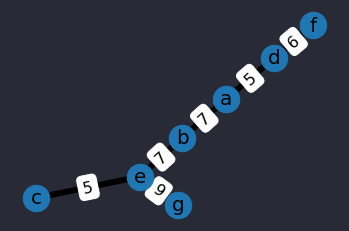

In [10]:
g = newGraph()
g.add_vertex("a", sys.maxsize)
g.add_vertex("b", sys.maxsize)
g.add_vertex("c", sys.maxsize)
g.add_vertex("d", sys.maxsize)
g.add_vertex("e", sys.maxsize)
g.add_vertex("f", sys.maxsize)
g.add_vertex("g", sys.maxsize)

g.add_edge("a", "b", 7)
g.add_edge("b", "a", 7)

g.add_edge("a", "d", 5)
g.add_edge("d", "a", 5)

g.add_edge("b", "c", 8)
g.add_edge("c", "b", 8)

g.add_edge("b", "d", 9)
g.add_edge("d", "b", 9)

g.add_edge("b", "e", 7)
g.add_edge("e", "b", 7)

g.add_edge("c", "e", 5)
g.add_edge("e", "c", 5)

g.add_edge("d", "e", 15)
g.add_edge("e", "d", 15)

g.add_edge("d", "f", 6)
g.add_edge("f", "d", 6)

g.add_edge("e", "f", 8)
g.add_edge("f", "e", 8)

g.add_edge("e", "g", 9)
g.add_edge("g", "e", 9)

g.add_edge("f", "g", 11)
g.add_edge("g", "f", 11)

origin_vertex = g.get_vertex("a")
prims(g, origin_vertex)
display_prim_results(g, origin_vertex)

#### Example 2

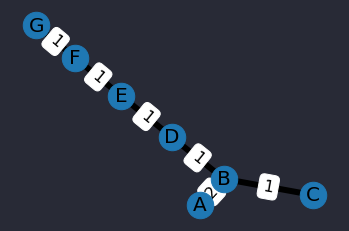

In [11]:
# build the Miller and Ranum Prim's example
g = newGraph()
g.add_vertex("A", sys.maxsize)
g.add_vertex("B", sys.maxsize)
g.add_vertex("C", sys.maxsize)
g.add_vertex("D", sys.maxsize)
g.add_vertex("E", sys.maxsize)
g.add_vertex("F", sys.maxsize)
g.add_vertex("G", sys.maxsize)

g.add_edge("A", "B", 2)
g.add_edge("B", "A", 2)

g.add_edge("A", "C", 3)
g.add_edge("C", "A", 3)

g.add_edge("B", "C", 1)
g.add_edge("C", "B", 1)

g.add_edge("B", "D", 1)
g.add_edge("D", "B", 1)

g.add_edge("D", "E", 1)
g.add_edge("E", "D", 1)

g.add_edge("B", "E", 4)
g.add_edge("E", "B", 4)

g.add_edge("E", "F", 1)
g.add_edge("F", "E", 1)

g.add_edge("C", "F", 5)
g.add_edge("F", "C", 5)

g.add_edge("F", "G", 1)
g.add_edge("G", "F", 1)

origin_vertex = g.get_vertex("A")
prims(g, origin_vertex)
display_prim_results(g, origin_vertex)

### Kruskal's Algorithm
In order to implement kruskal's algorithm, we have to implement a new data strucutre, the disjoint set

#### Disjoint set
A disjoint set is a collection that stores disjoint sets, which are sets that have no common elements

Each set consists of the following:
- parent/root: representative element of the set
- rank: "level" of the set

Disjoint-set data structure supporst the following operations:
- make (create collection of sets)
    - given a collection of data elements, create disjointed sets
    - add each element as a set with itself as the parent/root and a rank of 0
- find (find parent)
    - find the parent/root of the given element
    - used to identify if two elements belong to the same set
- union(merge)
    - combine two sets into one by comparing their parents/roots
        - if they have the same parent, do nothing
        - if they have different parents, merge them by assigning the highest ranked parent as the common parent
        - if they have parents of the same rank, choose either parent
        - increment the rank of the common parent

In [12]:
class DisjointSet:
    def __init__(self, elements=None):
        self.parent = {}
        self.rank = {}
        for e in elements:
            self.parent[e] = e
            self.rank[e] = 0

    def find(self, element):
        try:
            if self.parent[element] == element:
                return element
            else:
                return self.find(self.parent[element])
        except KeyError:
            return None

    def union(self, first, second):
        first_parent = self.find(first)
        second_parent = self.find(second)

        if first_parent is None or second_parent is None:
            return

        if first_parent == second_parent:
            pass

        else:
            if self.rank[first_parent] > self.rank[second_parent]:
                self.parent[second_parent] = first_parent
                self.rank[first_parent] += 1
            elif self.rank[first_parent] < self.rank[second_parent]:
                self.parent[first_parent] = second_parent
                self.rank[second_parent] += 1
            else:
                self.parent[second_parent] = first_parent
                self.rank[first_parent] += 1

#### back to kruskal's
- MST using sorted edges

1. Start with an empty MST
2. Enqueue all dges in the given graph to a priority queue `unvisitedQ`
3. While `unvisitedQ`  is not empty:
    - `currE` = `unvisitedQ.dequeue()`
    - if `u` and `v` vertices of `currE` are not already **connected**
        - add `u` and `v` vertices and `currE` to the MST
        - update `u` and `v` to be connected (union operation)
    - if `u` and `v` vertices of `currE` are already **connected**
        - discard the `currE` edge